## Importing Libraries

In [3]:
!pip install tensorflow --quiet


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [24]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [3]:
print(training_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>


In [55]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 97.25  88.    87.25]
   [ 91.    82.5   82.  ]
   [ 84.    75.5   75.  ]
   ...
   [ 82.5   74.5   80.5 ]
   [ 93.5   84.5   91.5 ]
   [ 82.    74.    80.  ]]

  [[175.75 165.75 164.75]
   [175.25 165.25 164.25]
   [161.25 151.25 150.25]
   ...
   [168.25 158.25 166.25]
   [175.25 165.25 173.25]
   [150.   140.   148.  ]]

  [[160.25 150.25 149.25]
   [162.25 152.25 151.25]
   [172.   162.   161.  ]
   ...
   [171.25 161.25 169.25]
   [162.5  152.5  160.5 ]
   [165.25 155.25 163.25]]

  ...

  [[133.   121.   121.  ]
   [146.   134.   134.  ]
   [154.5  142.5  142.5 ]
   ...
   [158.5  147.5  153.5 ]
   [143.5  132.5  138.5 ]
   [160.25 149.25 155.25]]

  [[149.25 137.25 137.25]
   [161.25 149.25 149.25]
   [135.75 123.75 123.75]
   ...
   [161.25 150.25 156.25]
   [139.75 128.75 134.75]
   [141.25 130.25 136.25]]

  [[168.5  156.5  156.5 ]
   [142.   130.   130.  ]
   [154.   142.   142.  ]
   ...
   [153.   142.   148.  ]
   [148.25 137.25 143.25]
   [168.25 157.25 16

# Building Model

In [146]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [147]:
model = Sequential()

## Building Convolution layer

In [148]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [149]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [150]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [151]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [152]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [153]:
model.add(Dropout(0.25)) # to Avoid Overfitting

In [154]:
model.add(Flatten())

In [155]:
model.add(Dropout(0.4))

In [156]:
model.add(Dense(units=1500, activation='relu'))

In [157]:
#Output Layer
model.add(Dense(units=38, activation='softmax'))

## Compiling Model

In [198]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [199]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_76 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [160]:
training_histroy = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2474s 1s/step - accuracy: 0.3781 - loss: 2.2266 - val_accuracy: 0.8393 - val_loss: 0.5109
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2348s 1s/step - accuracy: 0.8290 - loss: 0.5369 - val_accuracy: 0.9060 - val_loss: 0.2908
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2222s 1s/step - accuracy: 0.8990 - loss: 0.3116 - val_accuracy: 0.9336 - val_loss: 0.2067
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2164s 985ms/step - accuracy: 0.9287 - loss: 0.2156 - val_accuracy: 0.9454 - val_loss: 0.1705
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2168s 985ms/step - accuracy: 0.9485 - loss: 0.1581 - val_accuracy: 0.9619 - val_loss: 0.1162
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2198s 1s/step - accuracy: 0.9595 - loss: 0.1250 - val_accuracy: 0.9523 - val_loss: 0.1553
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2185s 994ms/step - accuracy: 0.9674 - loss: 0.1019 - val_accuracy: 0.9599 - val_loss: 0.1289
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2196s 999ms/step - accura

## Model Evaluation

In [161]:
#Model evaluation on training set
training_loss,training_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 626s 285ms/step - accuracy: 0.9626 - loss: 0.1257


In [162]:
print(training_loss, training_acc)

0.11635348945856094 0.9655309915542603


In [163]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 127s 230ms/step - accuracy: 0.9430 - loss: 0.1924


In [164]:
print(val_loss,val_acc)

0.20953905582427979 0.9415547251701355


## Saving Model

In [200]:
model.save("trained_model.keras")

In [167]:
training_histroy.history

{'accuracy': [0.5897431969642639,
  0.852407693862915,
  0.9091400504112244,
  0.9331104755401611,
  0.951461672782898,
  0.9601109623908997,
  0.9689736366271973,
  0.9726011753082275,
  0.9768262505531311,
  0.9801550507545471],
 'loss': [1.4061402082443237,
  0.461953341960907,
  0.27860233187675476,
  0.20205681025981903,
  0.14728927612304688,
  0.12159304320812225,
  0.09573237597942352,
  0.08329873532056808,
  0.06980651617050171,
  0.06181173771619797],
 'val_accuracy': [0.839346706867218,
  0.9059867858886719,
  0.9336444139480591,
  0.9453676342964172,
  0.9618711471557617,
  0.9522535800933838,
  0.959936261177063,
  0.9663669466972351,
  0.9759275913238525,
  0.9415547251701355],
 'val_loss': [0.5108564496040344,
  0.2907901108264923,
  0.20665496587753296,
  0.17046663165092468,
  0.11618097126483917,
  0.15527060627937317,
  0.12893801927566528,
  0.10844947397708893,
  0.08107096701860428,
  0.20953896641731262]}

In [168]:
# Recording  Hsitory in Json
import json
with open('training_hist.json','w') as f:
    json.dump(training_histroy.history,f)

## Acuracy Visualization

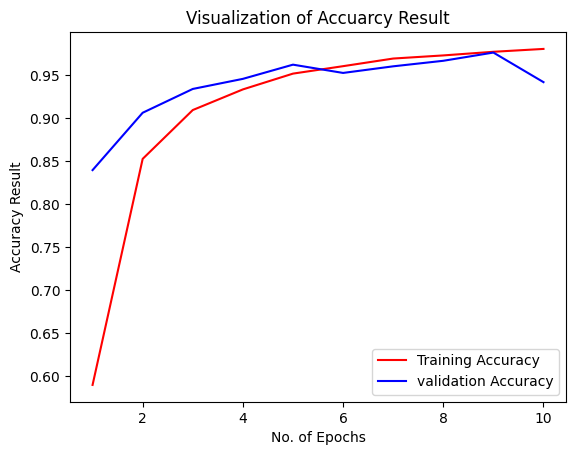

In [175]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_histroy.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,training_histroy.history['val_accuracy'], color='blue', label='validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuarcy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [176]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [177]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [179]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 120s 217ms/step


(array([[9.9967515e-01, 1.9903164e-06, 6.9716731e-07, ..., 1.0271439e-12,
         3.7922200e-12, 4.3118464e-11],
        [1.0000000e+00, 1.4319521e-09, 1.7547119e-09, ..., 1.7594161e-18,
         7.6322190e-16, 1.2717211e-16],
        [1.0000000e+00, 1.6102448e-09, 1.5112647e-11, ..., 4.0679944e-20,
         6.5272305e-18, 2.0575406e-16],
        ...,
        [9.7302499e-11, 1.9396778e-13, 2.0221269e-09, ..., 8.5968873e-13,
         1.4951243e-12, 9.9999762e-01],
        [2.5746272e-09, 2.9357001e-12, 1.7329471e-08, ..., 1.1978078e-10,
         1.2364858e-10, 9.9999428e-01],
        [1.1994937e-16, 2.4884514e-20, 7.9553784e-16, ..., 7.3075157e-22,
         6.4495650e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [180]:
predicted_categories = tf.argmax(y_pred,axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [181]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [183]:
y_true = tf.argmax(true_categories,axis = 1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [186]:
from sklearn.metrics import classification_report,confusion_matrix

In [185]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.95      0.95       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.97      0.96       440
                                   Apple___healthy       0.82      0.99      0.90       502
                               Blueberry___healthy       0.94      0.97      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.97       421
                 Cherry_(including_sour)___healthy       0.95      0.97      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.74      0.83       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.77      0.99      0.

In [189]:
cm = confusion_matrix(y_true,predicted_categories)
cm,cm.shape

(array([[478,   3,   1, ...,   0,   0,   0],
        [  0, 493,   0, ...,   0,   0,   0],
        [  0,   0, 425, ...,   0,   0,   3],
        ...,
        [  0,   0,   0, ..., 482,   0,   0],
        [  0,   0,   0, ...,   0, 435,   4],
        [  0,   0,   0, ...,   0,   0, 477]], dtype=int64),
 (38, 38))

In [192]:
import matplotlib.pyplot as plt

### Confusion Matrix visualisation

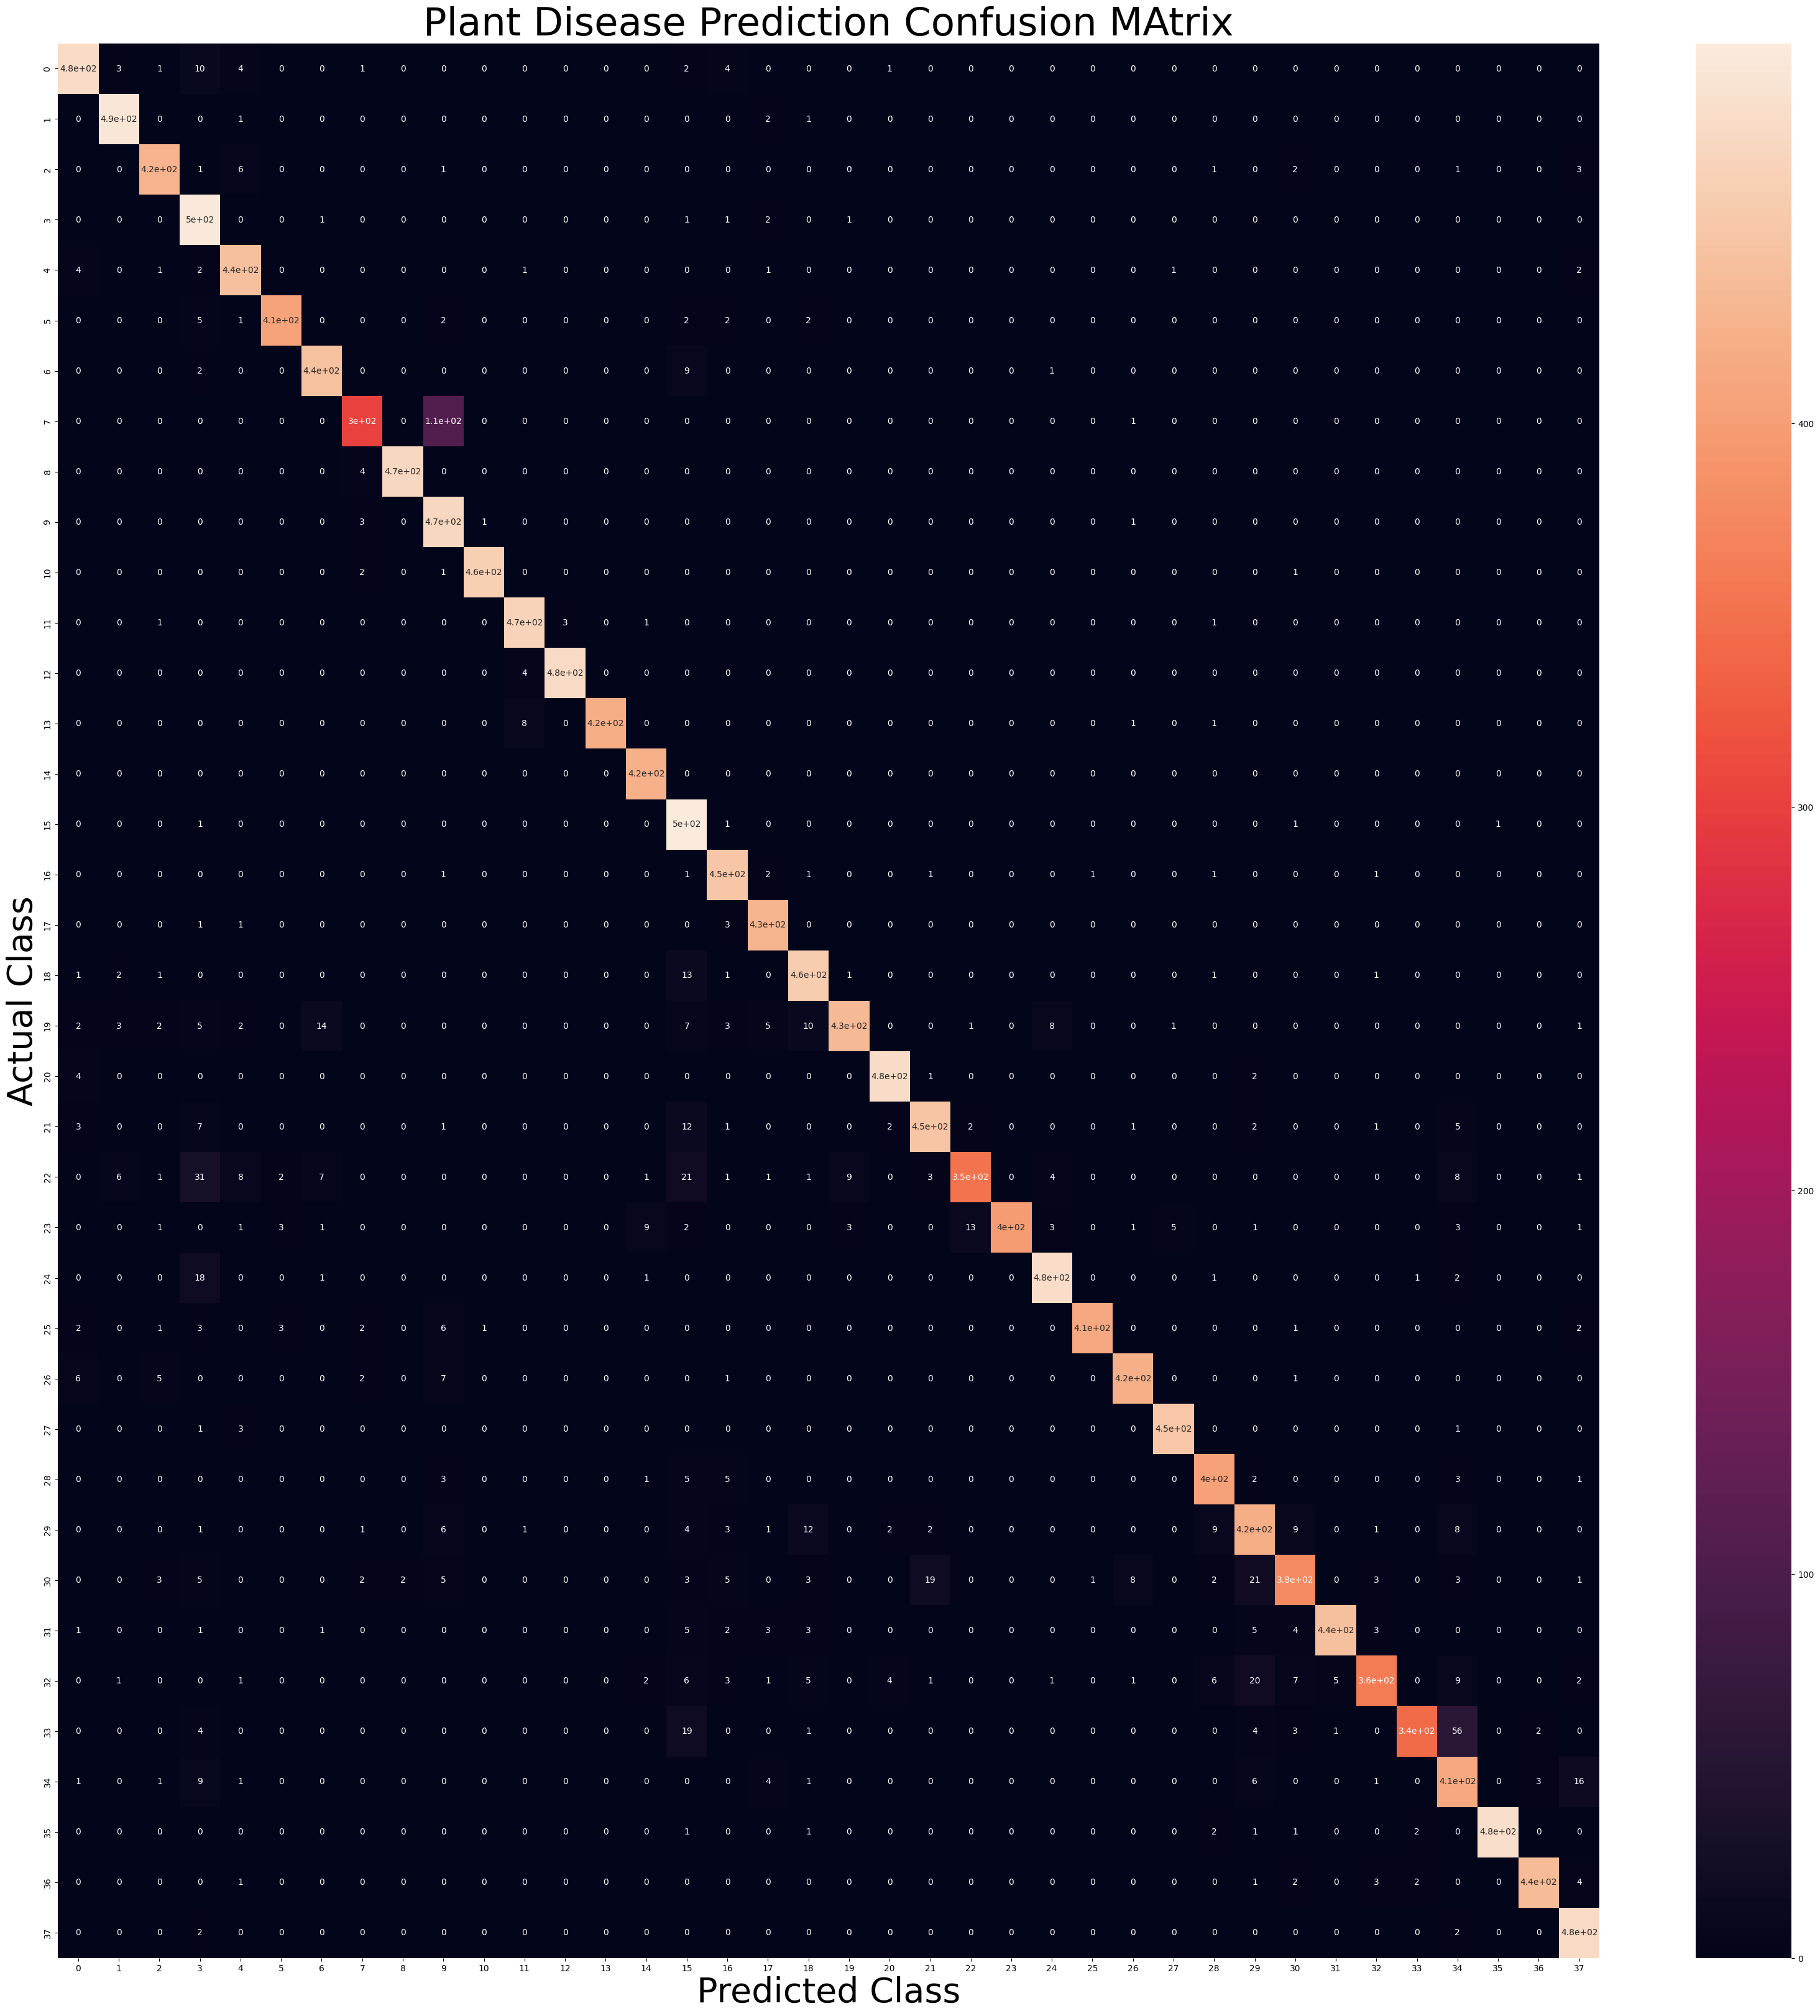

In [196]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=40)
plt.ylabel("Actual Class", fontsize=40)
plt.title("Plant Disease Prediction Confusion MAtrix", fontsize=45)
plt.show()